In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PyCUB import pyCUB
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
cub = pyCUB.PyCUB()
cub.load(folder='first500')

Reviewing all the 8951 files
YLR361C
341
53
162
196
200
9
343
22
201
336
260
266
140
222
2
215
214
298
204
210
375
363
210
49
199
324
393
192
197
4
298
377
263
145
325
285
195
242
51
284
191
204
24
289
221
302
289
72
264
4
54
389
185
17
219
246
203
6
65
61
269
305
225
222
4
81
277
166
256
164
22
57
286
195
151
309
11
288
22
290
71
265
202
384
39
205
182
243
217
301
297
272
62
294
228
242
212
315
298
192
54
300
291
294
194
100
9
297
333
250
5
25
179
23
296
233
164
4
217
20
247
217
278
317
206
229
186
15
370
274
295
318
284
21
203
39
287
22
227
185
308
217
63
25
149
304
221
52
193
201
187
230
27
27
207
27
281
304
44
164
292
183
299
9
205
204
22
304
232
185
15
6
203
14
21
60
24
189
318
20
18
394
195
238
248
205
301
195
62
391
35
325
262
262
219
385
6
12
290
381
164
22
308
201
317
4
289
260
17
210
218
222
52
214
24
66
343
222
20
324
256
140
215
212
380
368
254
35
292
244
25
332
208
274
178
200
287
59
195
24
62
9
332
218
388
176
194
3
239
18
78
47
230
215
142
16
22
12
235
14
49
23
289
212
3

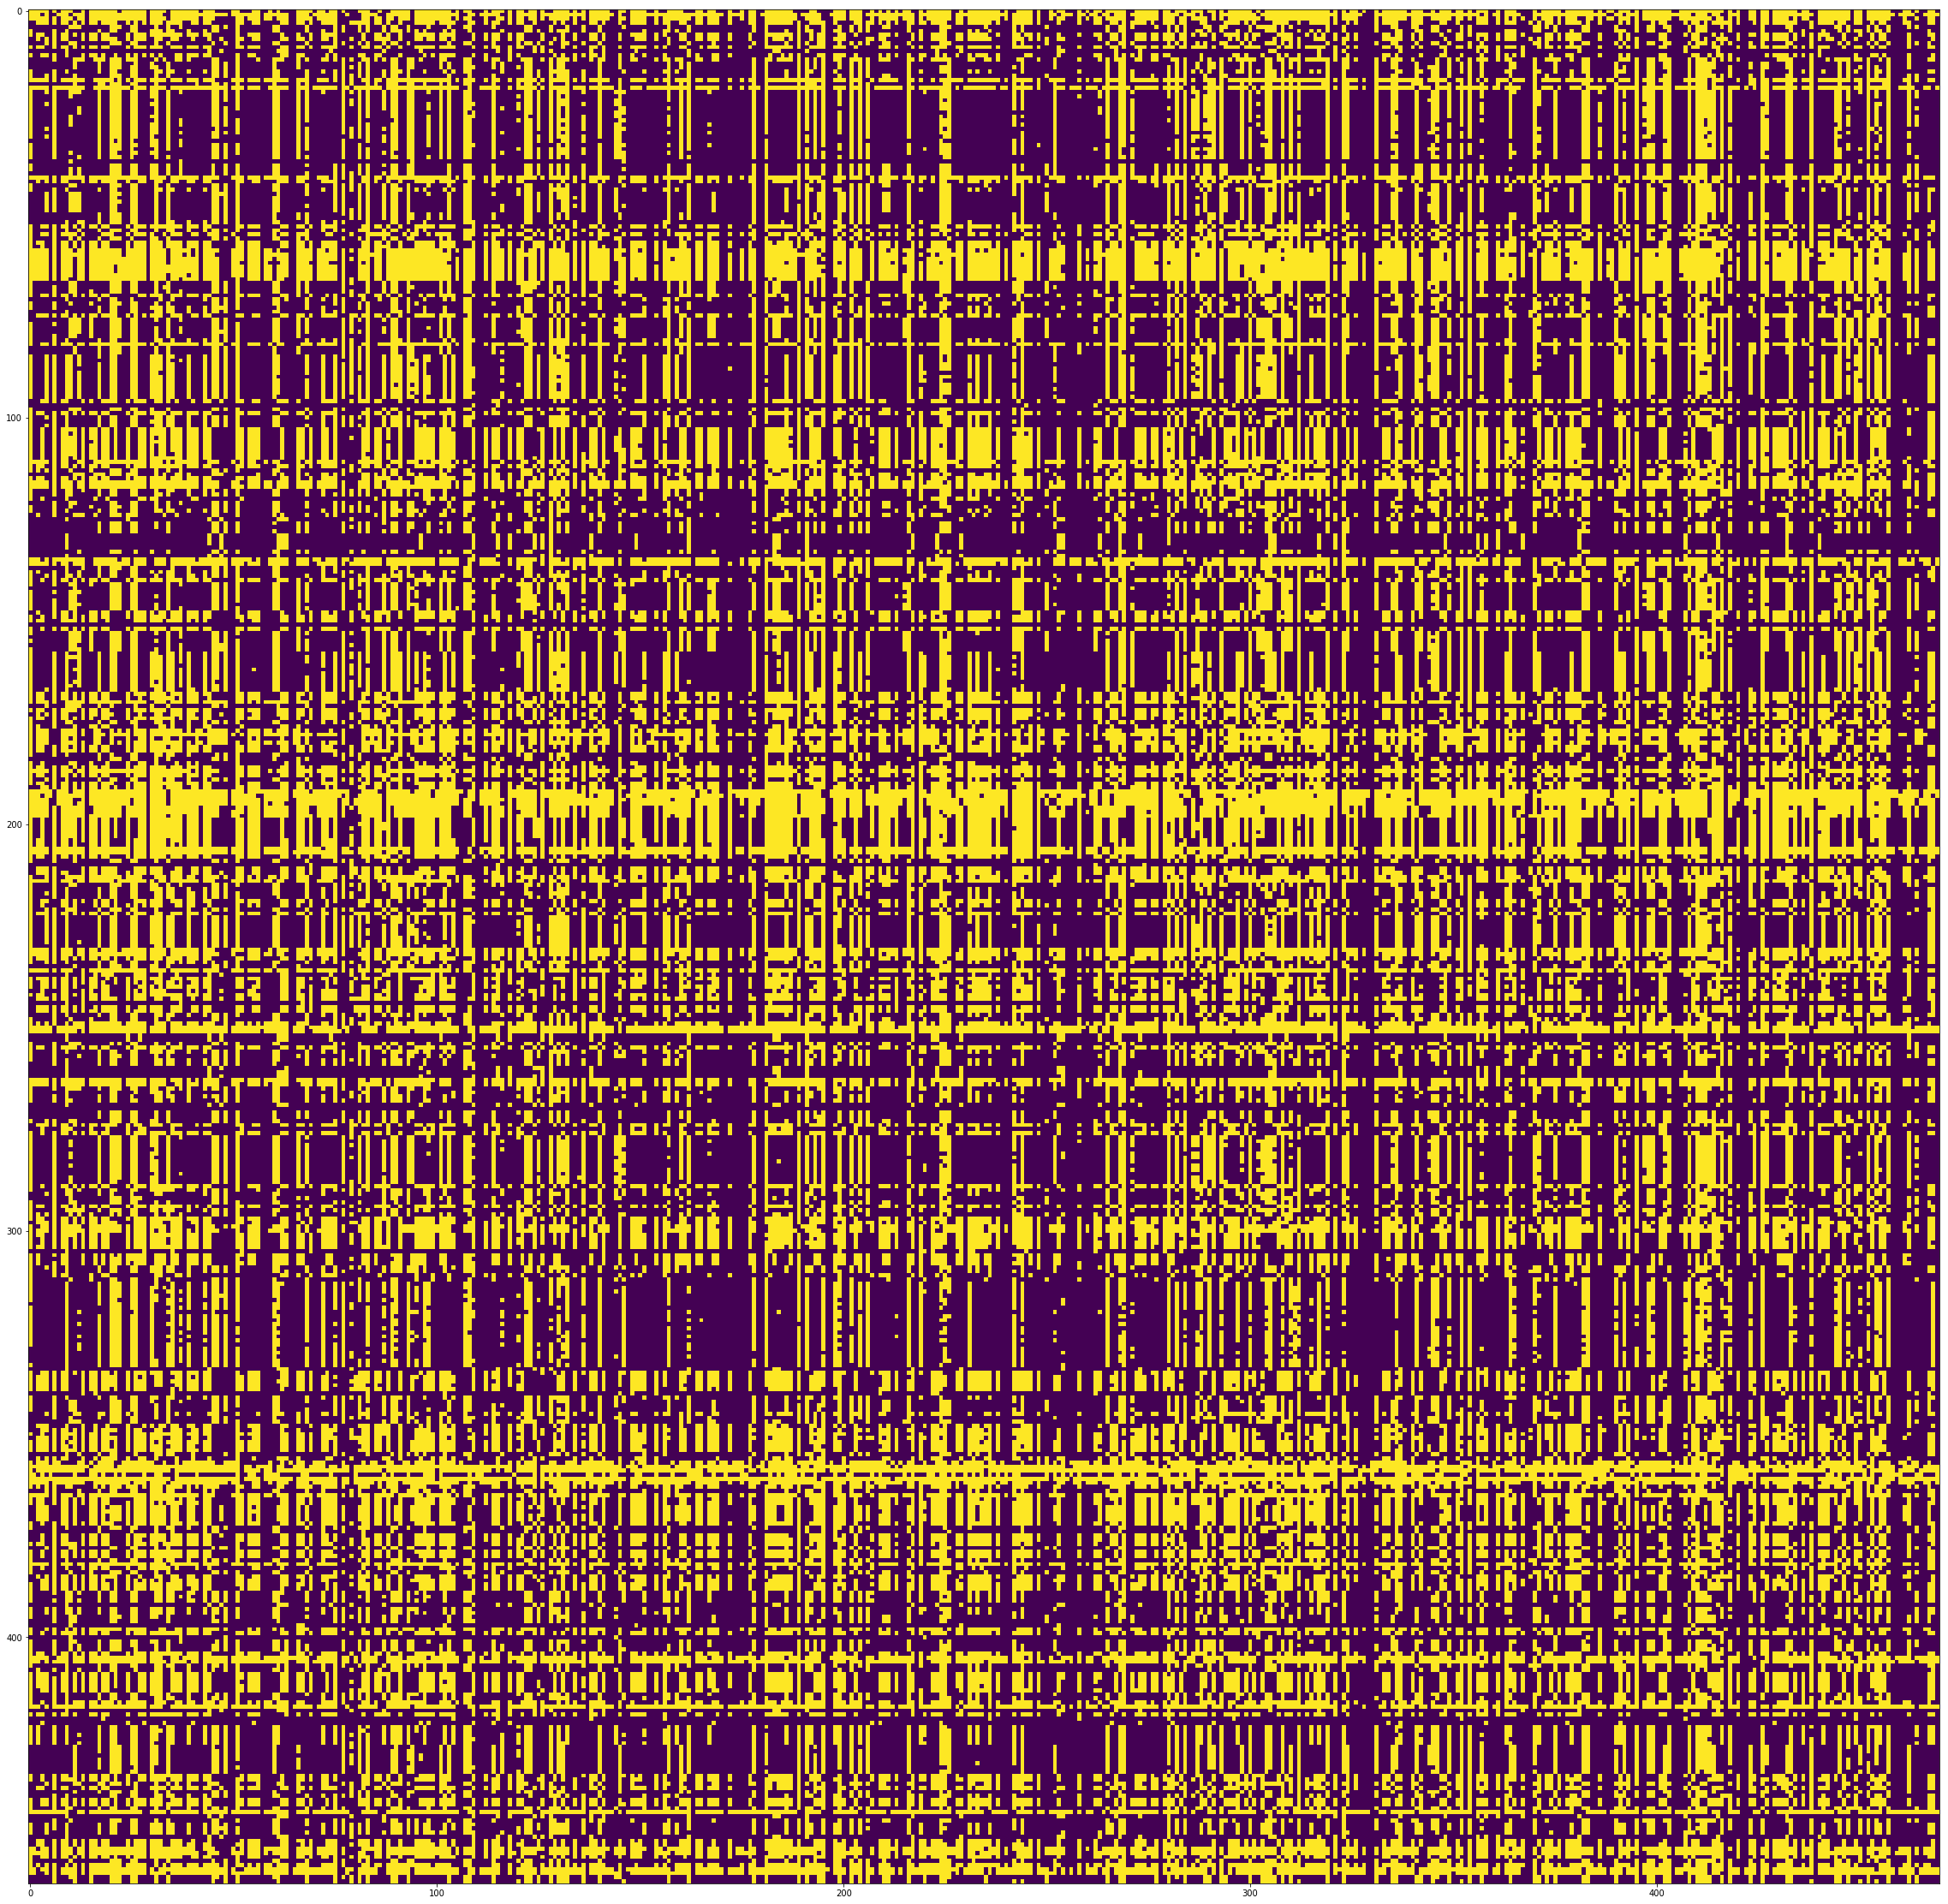

In [146]:
import numpy as np
plt.figure(figsize=(40,80))
#plt.imshow(np.matmul(cub.matrix.T ,cub.matrix))
plt.imshow(cub.matrix)
plt.show()

## can be seen as how similar species are to each others.

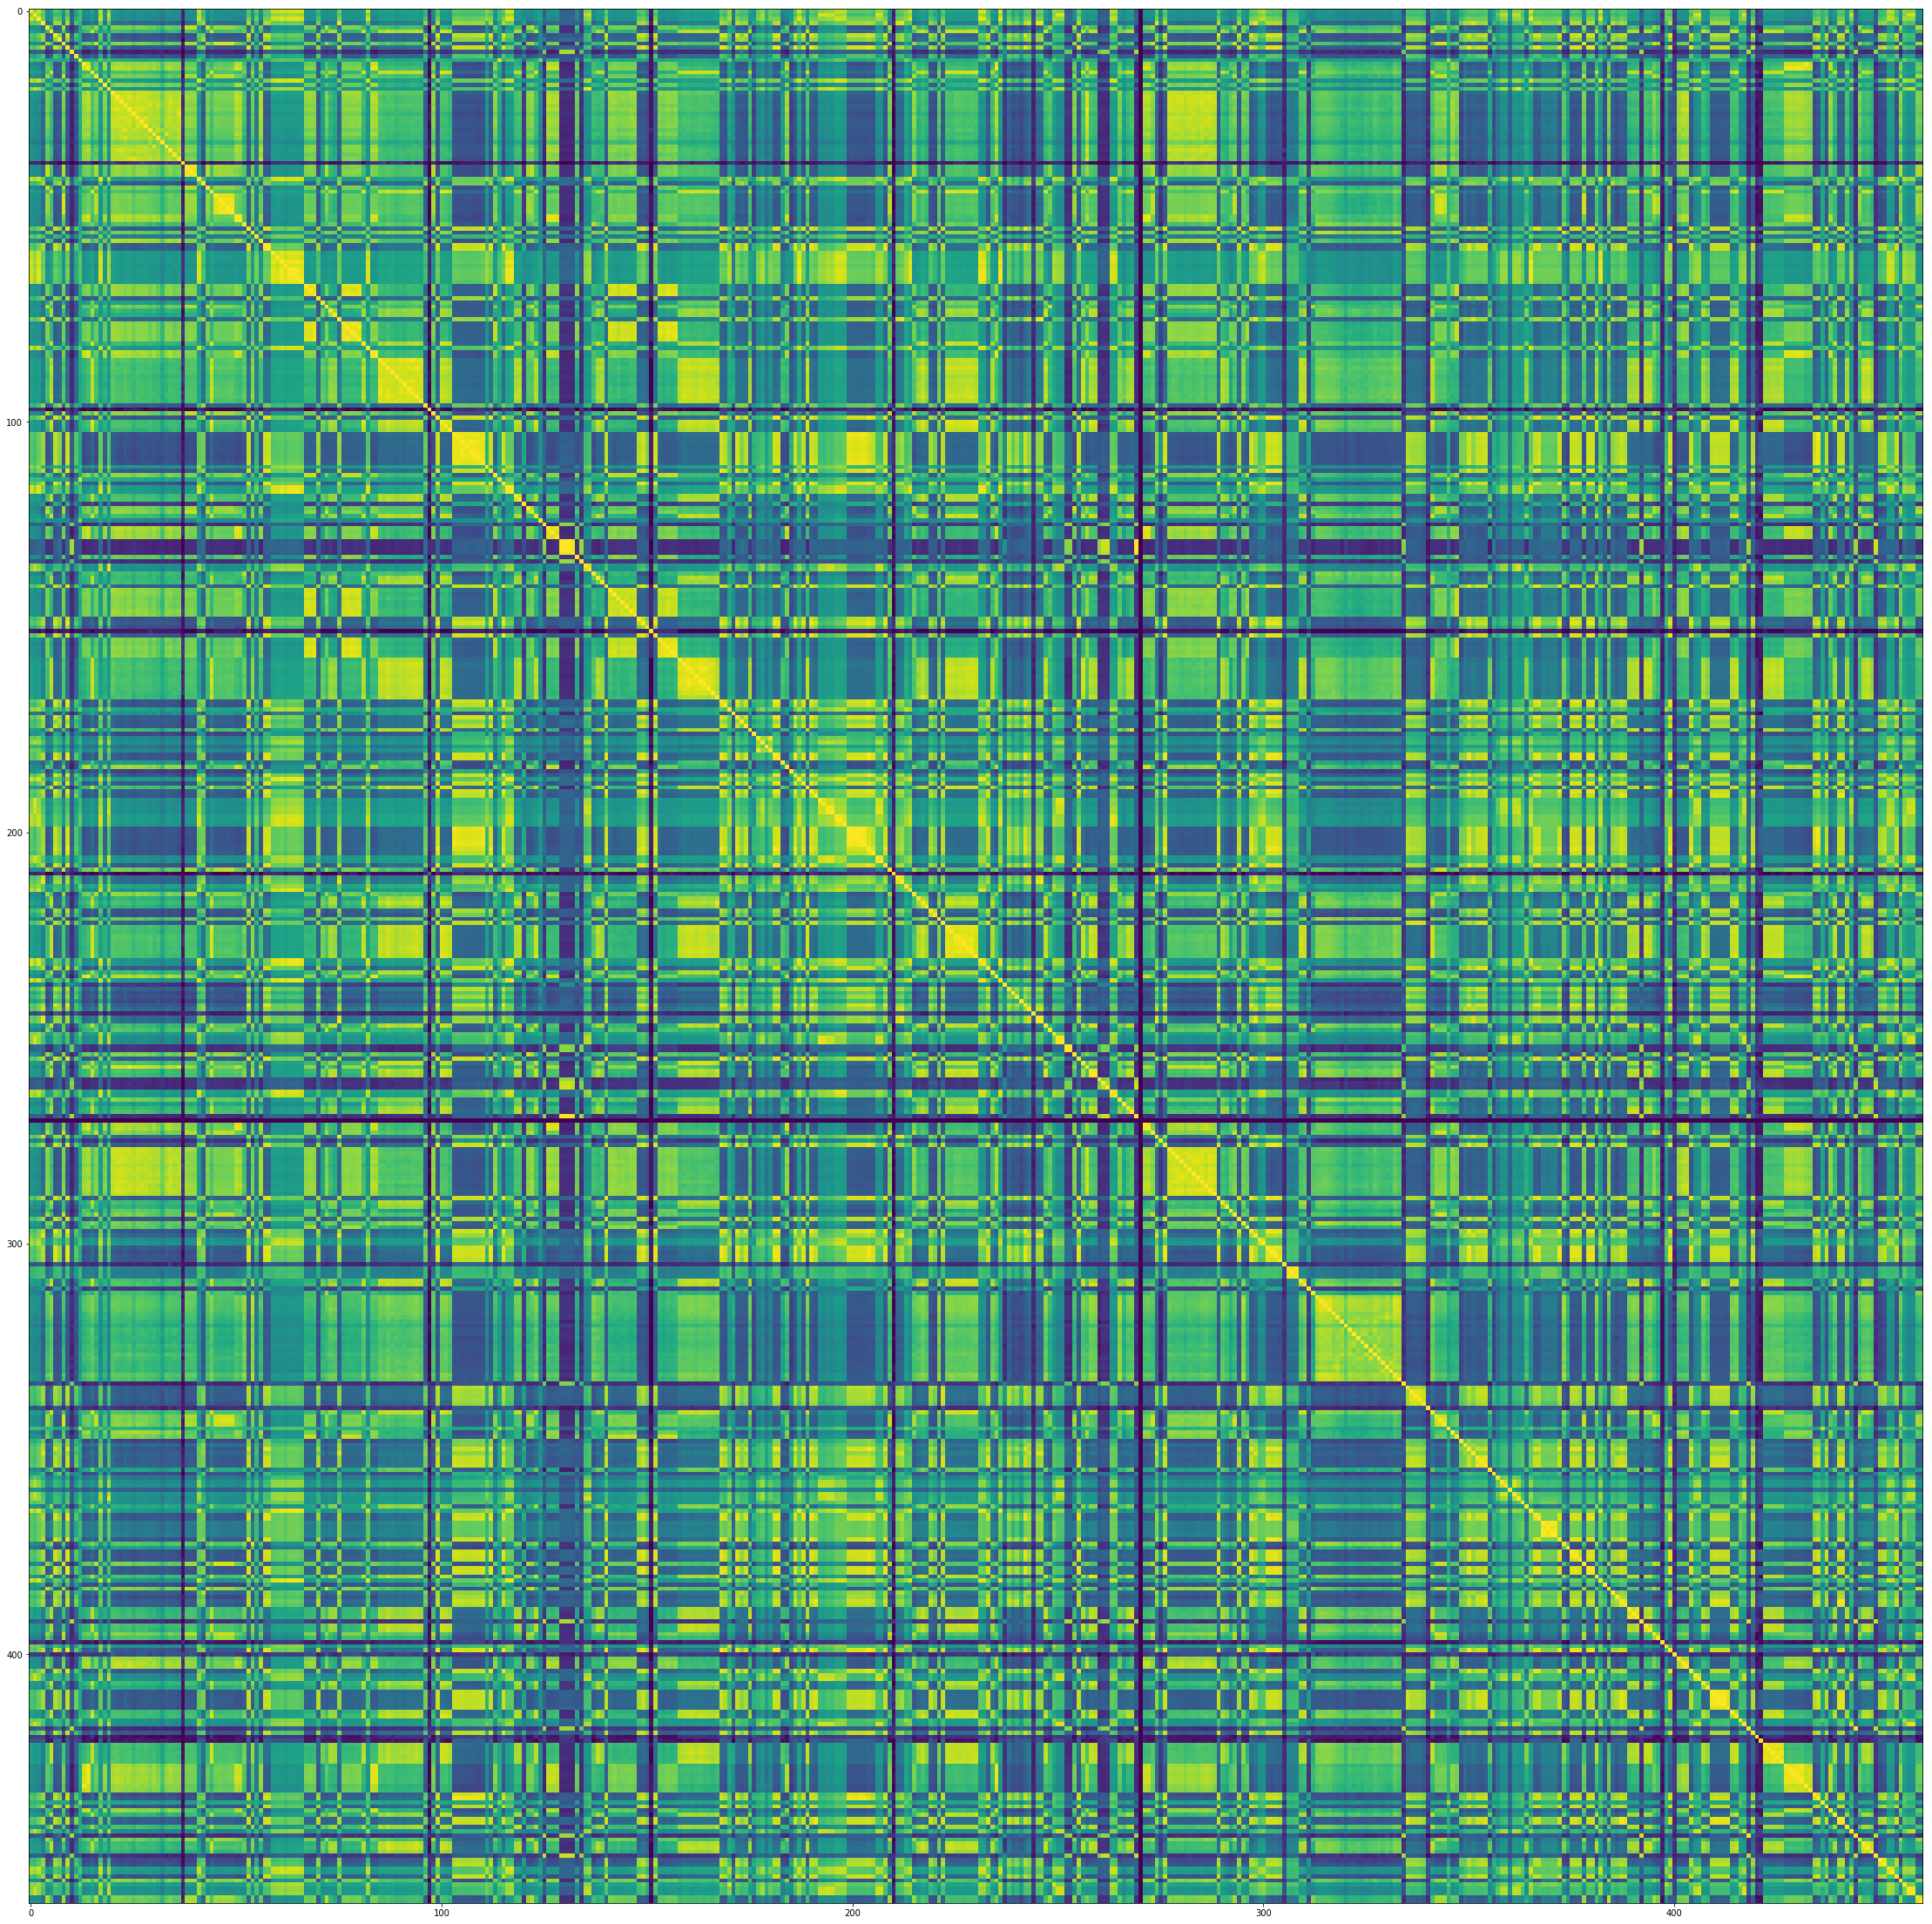

In [154]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

mat_sparse = sparse.csr_matrix(cub.matrix)
similarities = cosine_similarity(mat_sparse)
plt.figure(figsize=(40,40))

plt.imshow(similarities)
plt.show()

In [ ]:
similarities.shape

In [ ]:
from sklearn.cluster import KMeans

spect = KMeans(n_clusters=2, n_jobs=4)
spect.fit(cub.matrix)

In [ ]:
plt.figure(figsize=(40,40))
plt.imshow(spect.affinity_matrix_)
plt.show()

In [ ]:
clust = spect.labels_
a = np.where(clust == 0)
s = a[0].shape[0]
n = np.zeros((s,470))
s

In [224]:
n = cub.matrix[a[0]]
n.shape

(457, 470)

In [225]:
a = np.where(clust == 1)
n = np.append(n, cub.matrix[a[0]], axis=0)

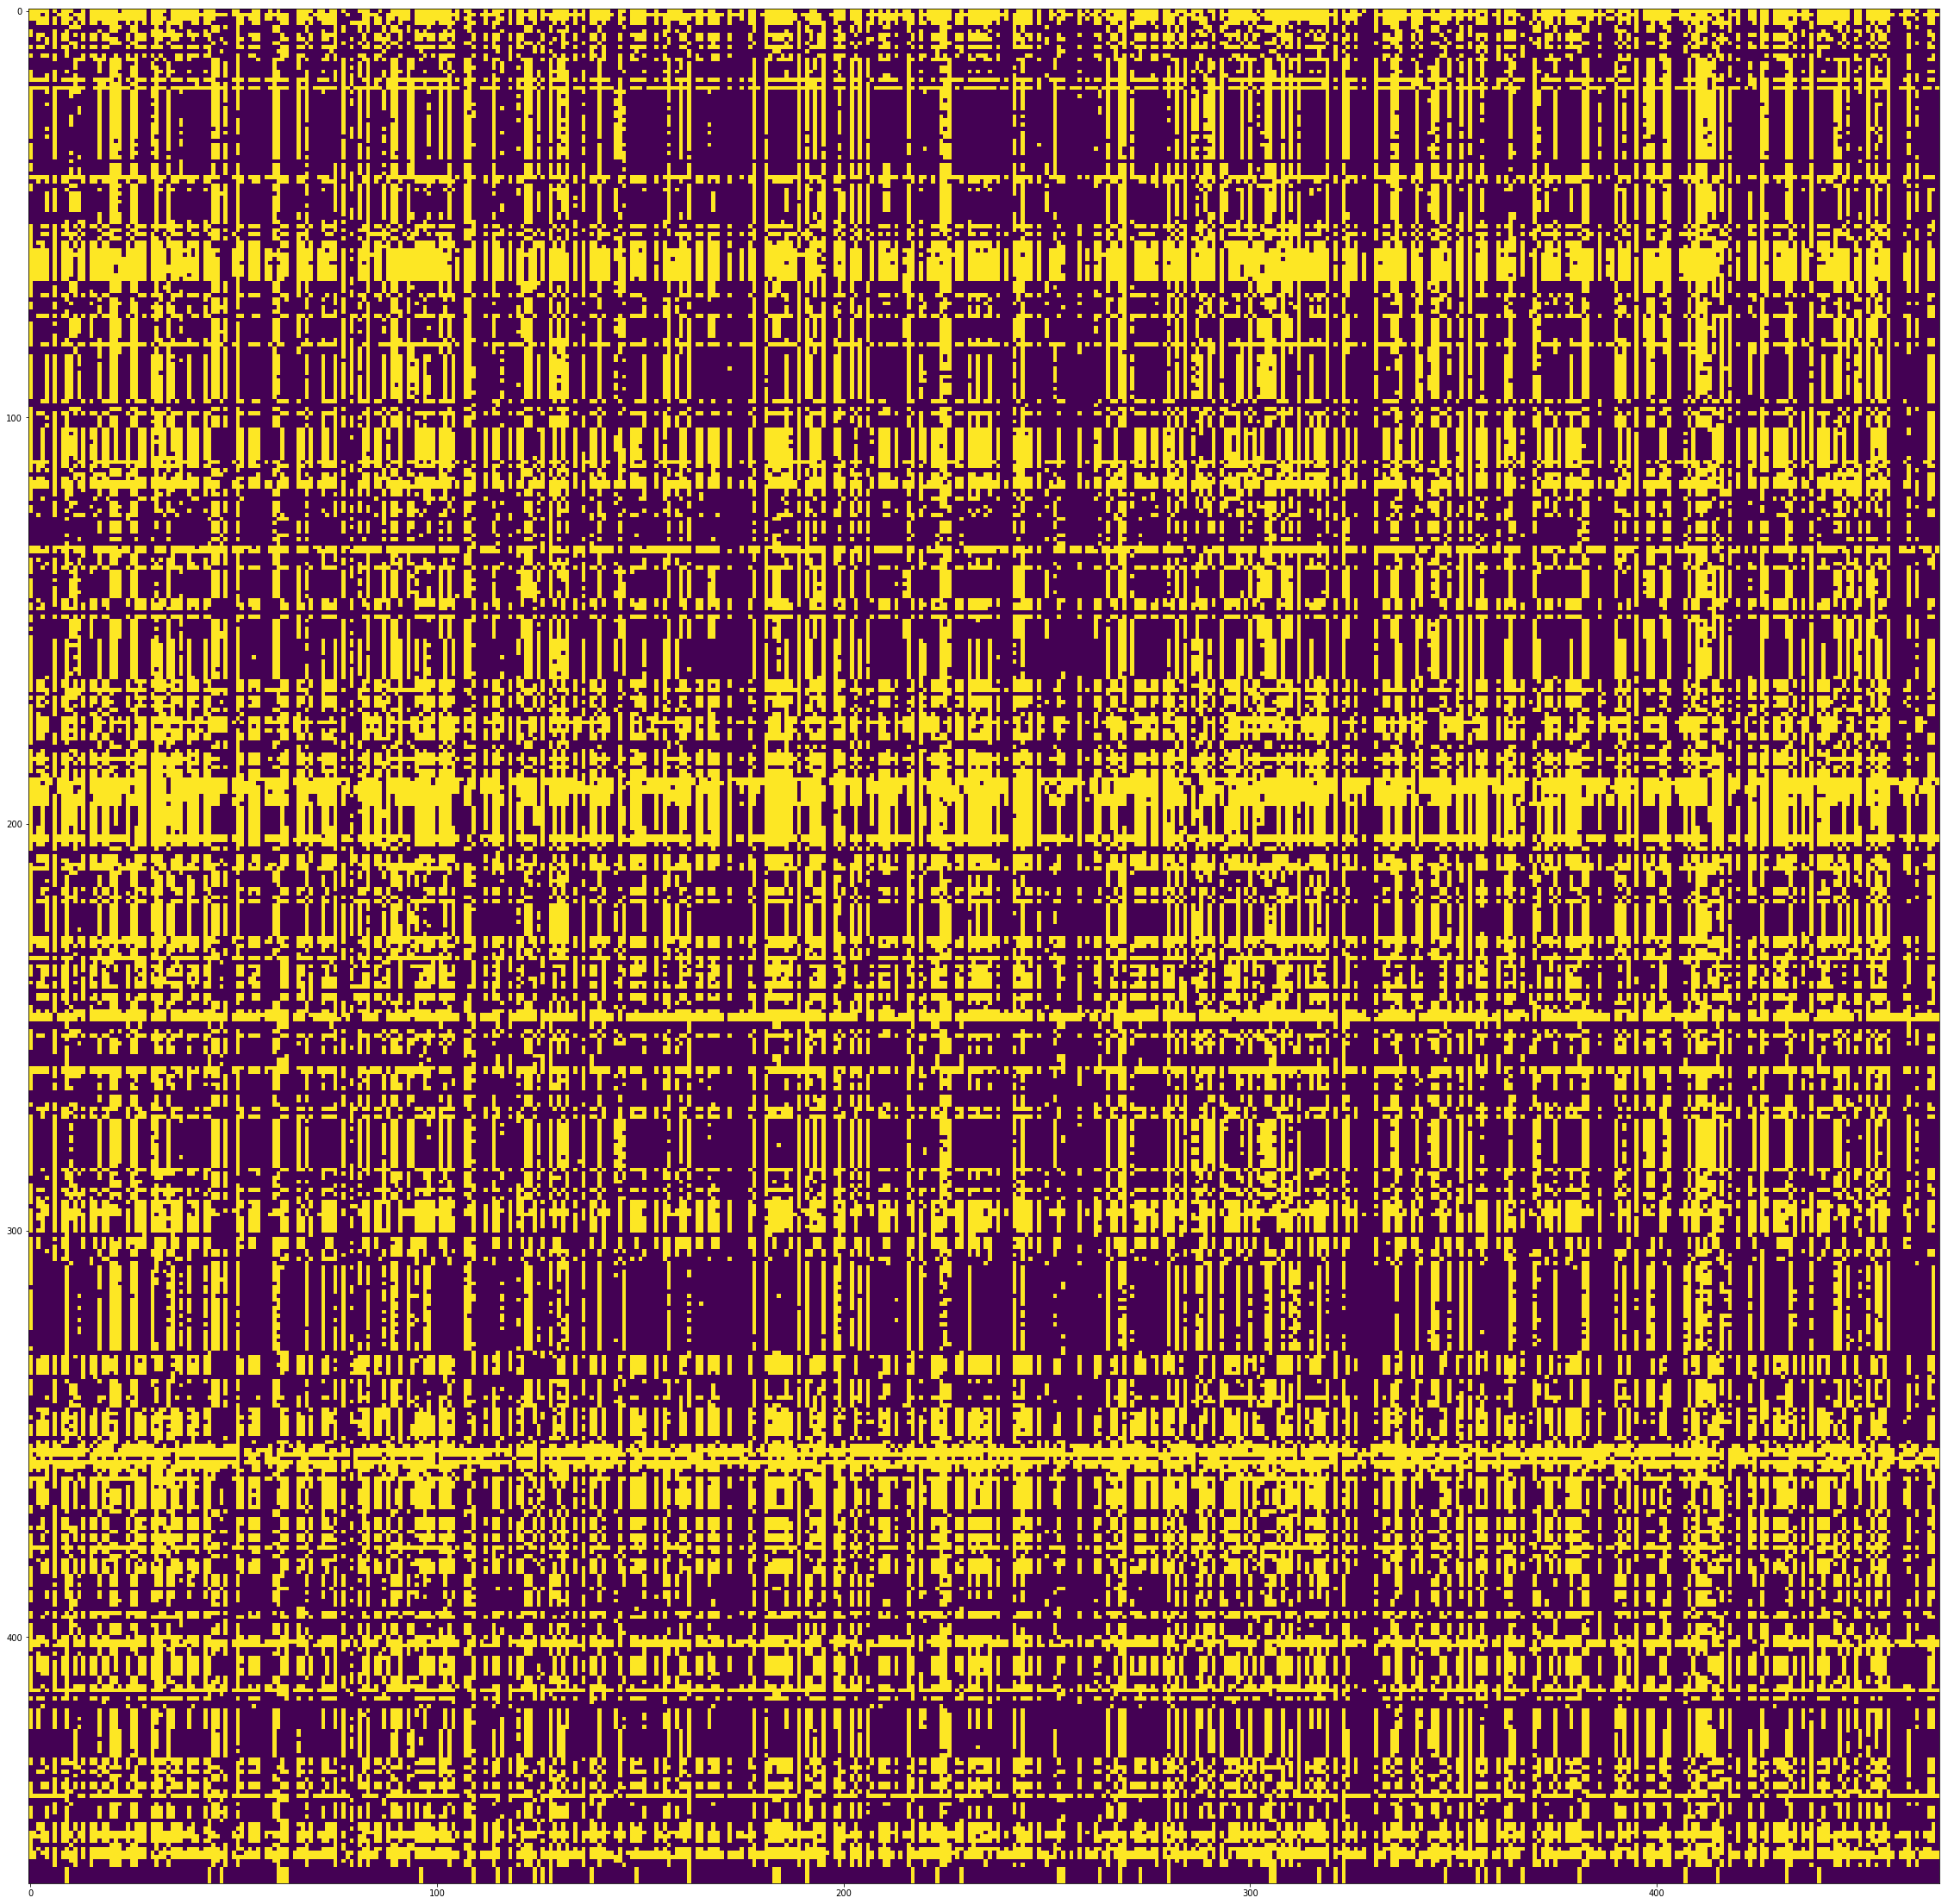

In [227]:
plt.figure(figsize=(40,40))
plt.imshow(n)
plt.show()

In [165]:
from sklearn.cluster import SpectralClustering

spectb = SpectralClustering(n_clusters=4, n_jobs=-1)
spectb.fit(similarities)

/Users/jeremie/anaconda2/envs/tensorflow1/lib/python2.7/site-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=4, n_init=10, n_jobs=-1, n_neighbors=10,
          random_state=None)

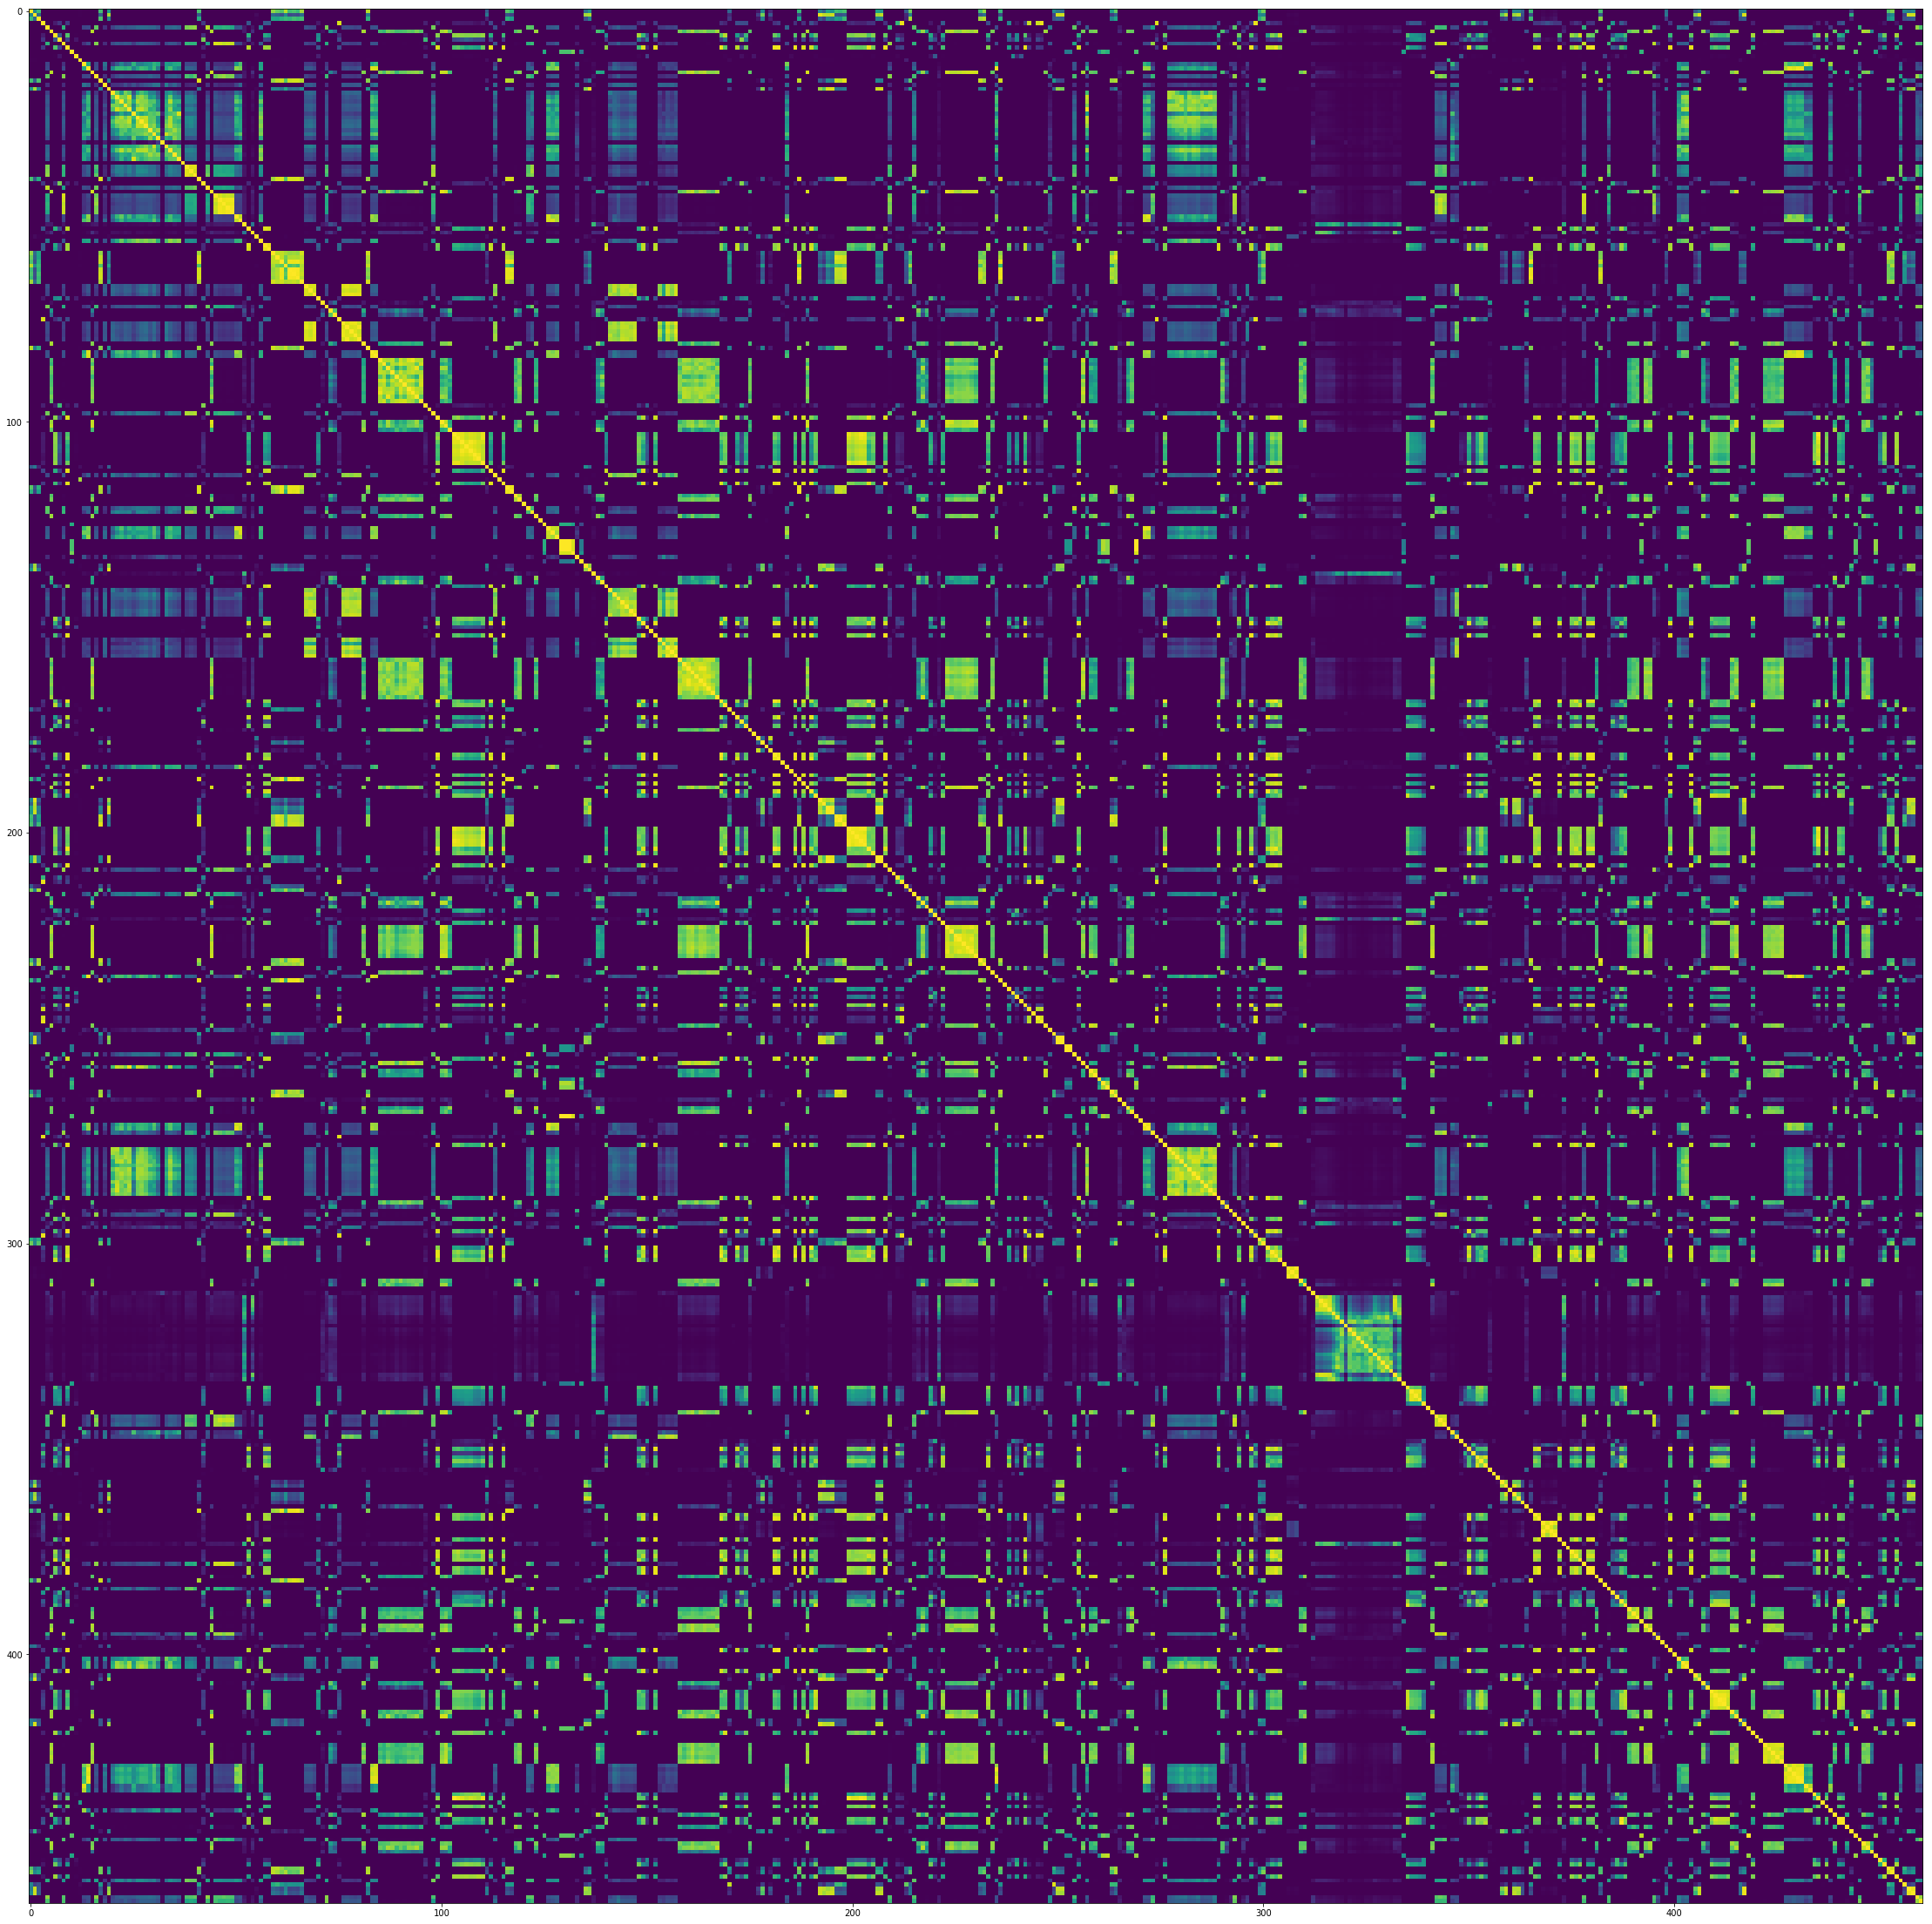

In [166]:
plt.figure(figsize=(40,40))
plt.imshow(spectb.affinity_matrix_)
plt.show()

In [167]:
spectb.labels_

array([0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 3, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 3, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3,
       3, 1, 2, 1, 1, 1, 1, 3, 3, 3, 0, 0, 1, 0, 1, 1, 3, 0, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       0, 0,

## Interactive plot :

In [6]:
from bokeh.plotting import *
from bokeh.models import HoverTool
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [8]:
GA = pi.Genes()
GA.plot_gene(tsne,Genes.specieslist[0],centroids=centroids,labels=labels)

Figure(id='e80b7ff9-4850-459d-a4dc-9e6f558291d3', ...)

In [49]:
import os
folder='first50'
folder = "data/" + folder
for f in os.listdir(folder):
    nameA = f.split('homology')[0]
nameA

'YBR084W'